In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import sqlite3
import pandas as pd
import numpy as np
from scipy import stats

In [2]:
plt.style.use('ggplot')

In [3]:
conn = sqlite3.connect('untap.db')
c = conn.cursor()
c.execute('SELECT * FROM demographics')
rows = c.fetchall()
test = pd.DataFrame(rows,columns=zip(*c.description)[0])
conn.close()

test.human_id = test.human_id.str.lower();
pgpdataE = pd.read_csv('PGP Ethnicity by Enrollment Date.csv')
pgpdataE.human_id = pgpdataE.human_id.str.lower();

alldata = pgpdataE.merge(test, on='human_id', how='outer')

In [4]:
## Note: categories based off of those in the 2000  US Census cateogories for race
## https://en.wikipedia.org/wiki/Race_and_ethnicity_in_the_United_States_Census#21st_century
## Examing groups used for phenotype/race just to make sure we get them all

race1 = alldata.groupby('race')['human_id'].count()
race2 = alldata.groupby('phenotype')['human_id'].count()

In [5]:
race1

race
                                       354
American Indian or Alaska Native        31
Asian                                   35
Black or African American               11
Caucasian (White)                        1
Hispanic or Latino                      12
Hispanic/Latino                         12
Native Hawaiian or Pacific Islander      1
White                                  859
Name: human_id, dtype: int64

In [6]:
idxWhite = alldata['race'].str.contains('White',na=False) | alldata['phenotype'].str.contains('White',na=False)
idxAsian = alldata['race'].str.contains('Asian',na=False) | alldata['phenotype'].str.contains('Asian',na=False)
idxBlack = alldata['race'].str.contains('Black',na=False) | alldata['phenotype'].str.contains('Black',na=False)
idxAIAN = alldata['race'].str.contains('Alaska Native',na=False) | alldata['phenotype'].str.contains('Alaska Native',na=False)
idxHispanic = alldata['race'].str.contains('Hispanic',na=False) | alldata['phenotype'].str.contains('Hispanic',na=False)
idxNHPC = alldata['race'].str.contains('Pacific',na=False) | alldata['phenotype'].str.contains('Pacific',na=False)

In [7]:
alldata['White'] = idxWhite
alldata['Asian'] = idxAsian
alldata['Black or African American'] = idxBlack
alldata['American Indian or Alaska Native'] = idxAIAN
alldata['Native Hawaiian or Pacific Islander'] = idxNHPC
alldata['Hispanic or Latino'] = idxHispanic

In [8]:
raceData = alldata[['White','Asian','Black or African American','American Indian or Alaska Native', 'Native Hawaiian or Pacific Islander']]

In [9]:
raceTotals = raceData.sum()
raceTotals = 100.*raceTotals/raceTotals.sum();
raceCompare = pd.DataFrame(columns=['PGP'])
raceCompare['PGP']= raceTotals[0:]
raceCompare['USA'] = [74.8, 1.7, 13.6, 1.7,0.4]; 

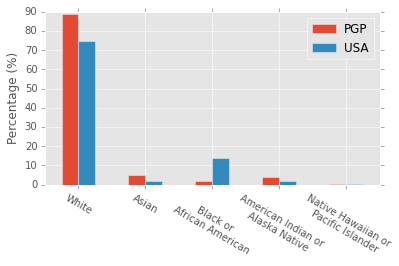

In [10]:
ax = raceCompare.plot(kind='bar')
labels = ax.get_xticklabels()
ax.set_xticklabels(['White','Asian','Black or\n African American',
                    'American Indian or\n Alaska Native', 'Native Hawaiian or\n Pacific Islander'],
                   rotation=330,fontsize = 10, multialignment = 'center') 

ax.set_ylabel('Percentage (%)')

plt.gcf().subplots_adjust(bottom=0.3)
plt.savefig('race.svg',format='svg')